# A Reanalysis of Lung Tumor Incidence in Mice Induced By Inorganic Arsenic Exposure
### Lyle D. Burgoon (US Army Engineer Research and Development Center), Ingrid Druwe (ORISE)
#### December 2, 2015
#### Updated: May 3, 2016


# Introduction
In Cohen et al (2014) and Cohen et al (2015) the authors raised interesting questions with respect to the reproducibility of the control animal tumor incidences in the Tokar et al (2011) and Waalkes et al (2014) studies. Cohen et al's objections, if true, would raise uncertainty about the quality of the Tokar and Waalkes studies. If Cohen et al's objections were true it would be difficult for either study to be used in support of a hazard and dose-response assessment of inorganic arsenic.

We started our analysis by focusing on Cohen et al's central question: whether the control tumor incidences in Waalkes et al differed from that reported in Tokar et al. If there were no substantive difference, then we would use the Tokar control data as a prior, and update the Waalkes data to obtain a more informed posterior distribution. From there, we assessed if there were differences in tumor incidences in the Waalkes data between the controls and inorganic exposed mice.

# Analysis

## Are Control Tumor Incidences in Tokar et al's Data Different From Waalkes et al's Data?
The Tokar et al (http://www.ncbi.nlm.nih.gov/pmc/articles/PMC3003832/), Tokar et al (http://www.ncbi.nlm.nih.gov/pmc/articles/PMC3285471/) and Waalkes et al (http://www.ncbi.nlm.nih.gov/pmc/articles/PMC4130362/) lung adenoma and carcinoma data for male mice were used. 

In [1]:
library(ggplot2)
library(rstan)
tokar1_tumors <- 10
tokar1_animals <- 29
tokar2_tumors <- 10
tokar2_animals <- 49
waalkes_tumors <- 8
waalkes_animals <- 36

rstan (Version 2.9.0-3, packaged: 2016-02-11 15:54:41 UTC, GitRev: 05c3d0058b6a)
For execution on a local, multicore CPU with excess RAM we recommend calling
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())


We used R and Stan to perform Markov Chain Monte Carlo (MCMC) Bayesian analysis. First, we constructed and compiled the Stan model. Then we used Stan to calculate the posterior probability distribution for the tumor incidences in the controls. We used a Bernoulli distribution to model the data from Tokar et al and Waalkes et al. We used a noninformative beta conjugate distribution as we had no prior knowledge of the control tumor incidences at the NIEHS/NTP laboratories. 


SAMPLING FOR MODEL '2dcba63f61ddd7c9bd68c7381443898a' NOW (CHAIN 1).

Chain 1, Iteration:    1 / 5000 [  0%]  (Warmup)
Chain 1, Iteration:  201 / 5000 [  4%]  (Sampling)
Chain 1, Iteration:  700 / 5000 [ 14%]  (Sampling)
Chain 1, Iteration: 1200 / 5000 [ 24%]  (Sampling)
Chain 1, Iteration: 1700 / 5000 [ 34%]  (Sampling)
Chain 1, Iteration: 2200 / 5000 [ 44%]  (Sampling)
Chain 1, Iteration: 2700 / 5000 [ 54%]  (Sampling)
Chain 1, Iteration: 3200 / 5000 [ 64%]  (Sampling)
Chain 1, Iteration: 3700 / 5000 [ 74%]  (Sampling)
Chain 1, Iteration: 4200 / 5000 [ 84%]  (Sampling)
Chain 1, Iteration: 4700 / 5000 [ 94%]  (Sampling)
Chain 1, Iteration: 5000 / 5000 [100%]  (Sampling)# 
#  Elapsed Time: 0.00229 seconds (Warm-up)
#                0.043812 seconds (Sampling)
#                0.046102 seconds (Total)
# 

SAMPLING FOR MODEL '2dcba63f61ddd7c9bd68c7381443898a' NOW (CHAIN 2).

Chain 2, Iteration:    1 / 5000 [  0%]  (Warmup)
Chain 2, Iteration:  201 / 5000 [  4%]  (Sampling)
Chain 2, Iter

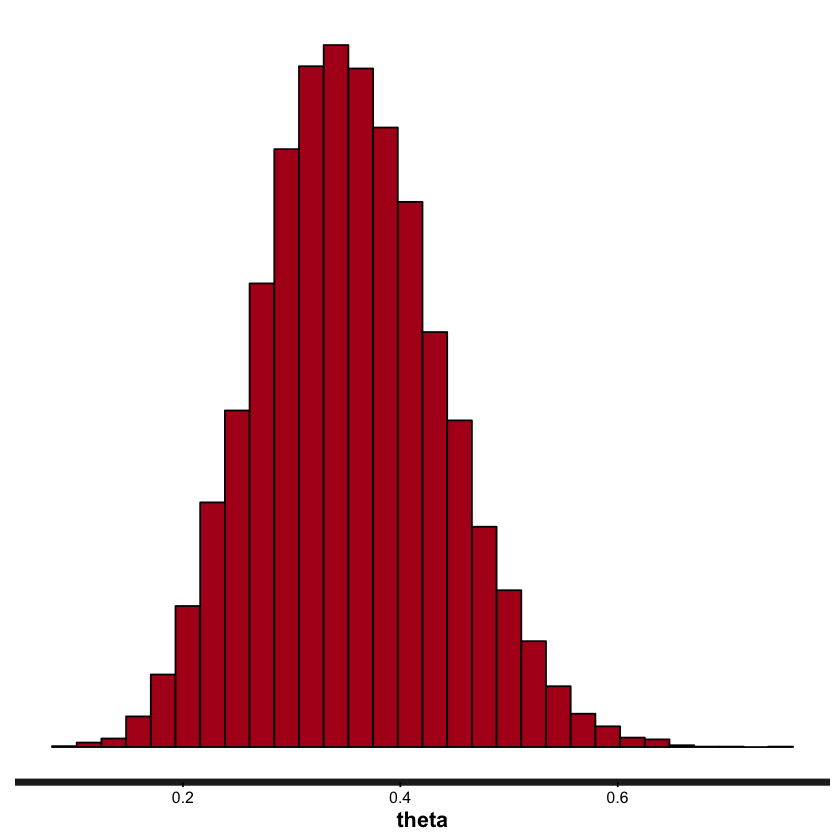

In [10]:
# THE MODEL.
tokar_modelString = "
data {
  int<lower=0> N;     //number of items
  int y[N];           // y is an N-length vector of ints
}
parameters {
  real <lower=0, upper=1> theta;
}
model {
  theta ~ beta(1,1);
  y ~ bernoulli(theta);
}
"

stanDso <- stan_model( model_code=tokar_modelString )

N <- tokar1_animals
z <- tokar1_tumors
y <- c( rep( 1, z), rep( 0, N-z)) 
dataList <- list( y = y , N = N ) 


#This is going to do the MCMC for Tokar's data. Note we're using a flat prior.
stanFitT <- sampling( object = stanDso , data = dataList , chains = 3 , iter = 5000 , warmup = 200 , thin = 1)
quietgg(stan_hist(stanFitT))


The histogram of posterior probability of the tumor incidences in Tokar's controls shows that it is centered at 35%. In a Bayesian context, the spread of the distribution represents our uncertainty in the control tumor incidences. This distribution is largely informed by the likelihood from Tokar's data (10/29 = 34.4%).

Next, we are going to analyze the Tokar et al 2012 data. The same model is used. The only difference is that we are using the data from the Tokar et al 2012 paper.


SAMPLING FOR MODEL '2dcba63f61ddd7c9bd68c7381443898a' NOW (CHAIN 1).

Chain 1, Iteration:    1 / 5000 [  0%]  (Warmup)
Chain 1, Iteration:  201 / 5000 [  4%]  (Sampling)
Chain 1, Iteration:  700 / 5000 [ 14%]  (Sampling)
Chain 1, Iteration: 1200 / 5000 [ 24%]  (Sampling)
Chain 1, Iteration: 1700 / 5000 [ 34%]  (Sampling)
Chain 1, Iteration: 2200 / 5000 [ 44%]  (Sampling)
Chain 1, Iteration: 2700 / 5000 [ 54%]  (Sampling)
Chain 1, Iteration: 3200 / 5000 [ 64%]  (Sampling)
Chain 1, Iteration: 3700 / 5000 [ 74%]  (Sampling)
Chain 1, Iteration: 4200 / 5000 [ 84%]  (Sampling)
Chain 1, Iteration: 4700 / 5000 [ 94%]  (Sampling)
Chain 1, Iteration: 5000 / 5000 [100%]  (Sampling)# 
#  Elapsed Time: 0.002432 seconds (Warm-up)
#                0.05145 seconds (Sampling)
#                0.053882 seconds (Total)
# 

SAMPLING FOR MODEL '2dcba63f61ddd7c9bd68c7381443898a' NOW (CHAIN 2).

Chain 2, Iteration:    1 / 5000 [  0%]  (Warmup)
Chain 2, Iteration:  201 / 5000 [  4%]  (Sampling)
Chain 2, Iter

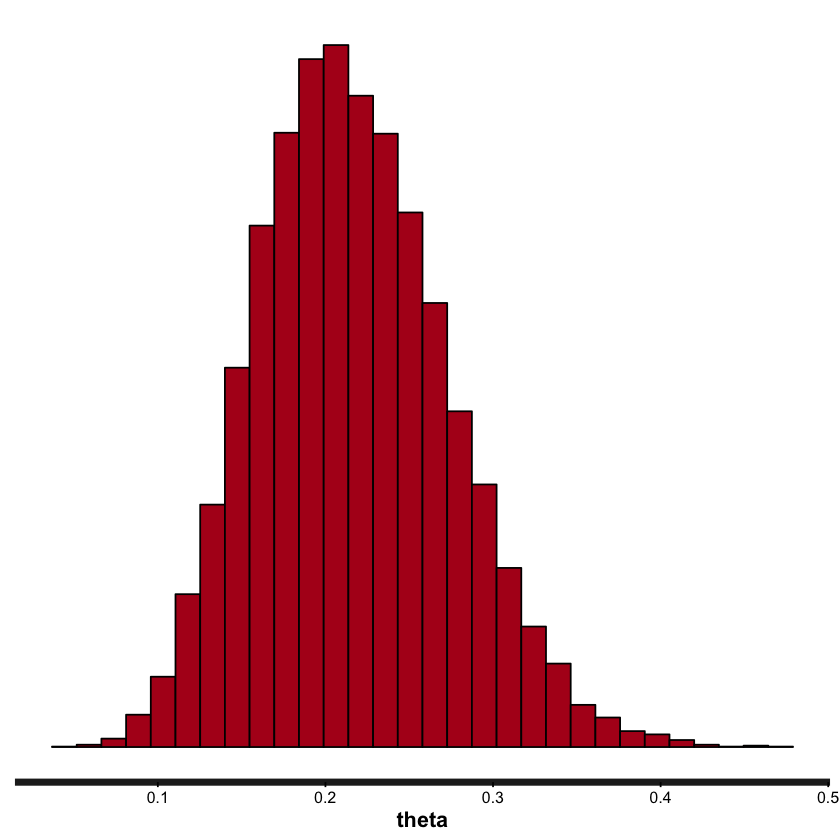

In [11]:
Nw <- tokar2_animals
zw <- tokar2_tumors
yw <- c(rep(1,zw), rep(0, Nw-zw))
dataListW <- list(y=yw, N=Nw)
stanFitT2 <- sampling( object = stanDso , data = dataListW , chains = 3 , iter = 5000 , warmup = 200 , thin = 1 )
quietgg(stan_hist(stanFitT2))

The histogram of posterior probability of the tumor incidences in Tokar's controls shows that it is centered at 21%. In a Bayesian context, the spread of the distribution represents our uncertainty in the control tumor incidences. This distribution is largely informed by the likelihood from Tokar's data (10/49 = 20.4%).

Next, we are going to analyze Waalkes et al's data. The same model is used. The only difference is that we are using the data from the Waalkes et al paper.


SAMPLING FOR MODEL '2dcba63f61ddd7c9bd68c7381443898a' NOW (CHAIN 1).

Chain 1, Iteration:    1 / 5000 [  0%]  (Warmup)
Chain 1, Iteration:  201 / 5000 [  4%]  (Sampling)
Chain 1, Iteration:  700 / 5000 [ 14%]  (Sampling)
Chain 1, Iteration: 1200 / 5000 [ 24%]  (Sampling)
Chain 1, Iteration: 1700 / 5000 [ 34%]  (Sampling)
Chain 1, Iteration: 2200 / 5000 [ 44%]  (Sampling)
Chain 1, Iteration: 2700 / 5000 [ 54%]  (Sampling)
Chain 1, Iteration: 3200 / 5000 [ 64%]  (Sampling)
Chain 1, Iteration: 3700 / 5000 [ 74%]  (Sampling)
Chain 1, Iteration: 4200 / 5000 [ 84%]  (Sampling)
Chain 1, Iteration: 4700 / 5000 [ 94%]  (Sampling)
Chain 1, Iteration: 5000 / 5000 [100%]  (Sampling)# 
#  Elapsed Time: 0.002971 seconds (Warm-up)
#                0.055025 seconds (Sampling)
#                0.057996 seconds (Total)
# 

SAMPLING FOR MODEL '2dcba63f61ddd7c9bd68c7381443898a' NOW (CHAIN 2).

Chain 2, Iteration:    1 / 5000 [  0%]  (Warmup)
Chain 2, Iteration:  201 / 5000 [  4%]  (Sampling)
Chain 2, Ite

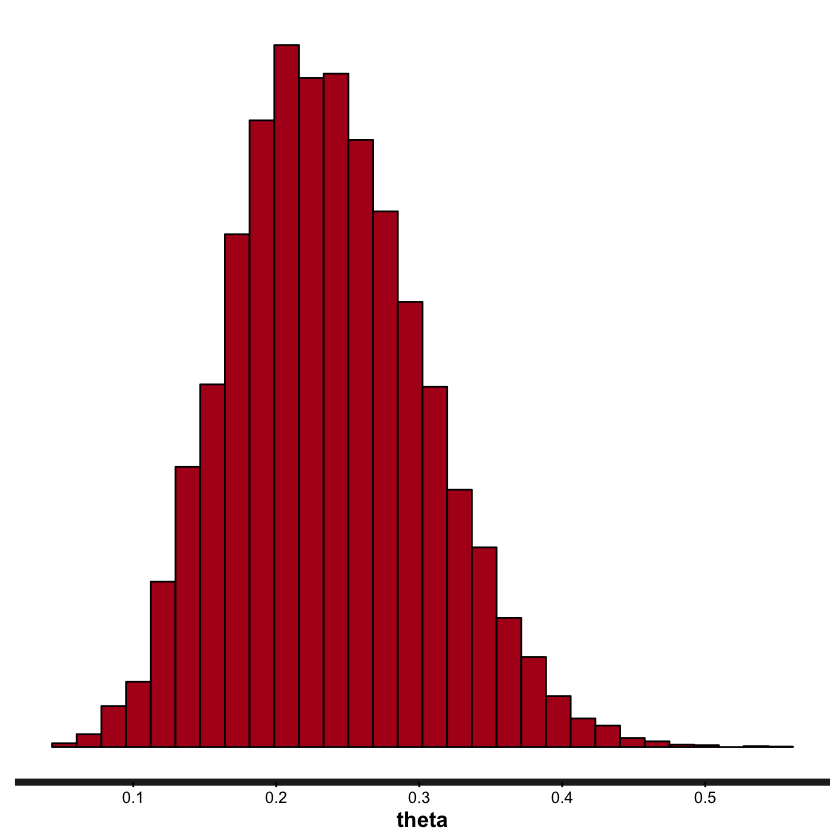

In [12]:
Nw <- waalkes_animals
zw <- waalkes_tumors
yw <- c(rep(1,zw), rep(0, Nw-zw))
dataListW <- list(y=yw, N=Nw)
stanFitW <- sampling( object = stanDso , data = dataListW , chains = 3 , iter = 5000 , warmup = 200 , thin = 1 )
quietgg(stan_hist(stanFitW))

The histogram of posterior probability of the tumor incidences in Waalkes et al controls shows that it is centered at 24%. Again, the spread of the distribution represents our uncertainty in the control tumor incidences. This distribution is largely informed by the likelihood from Waalkes et al's data (8/36 = 22.2%).

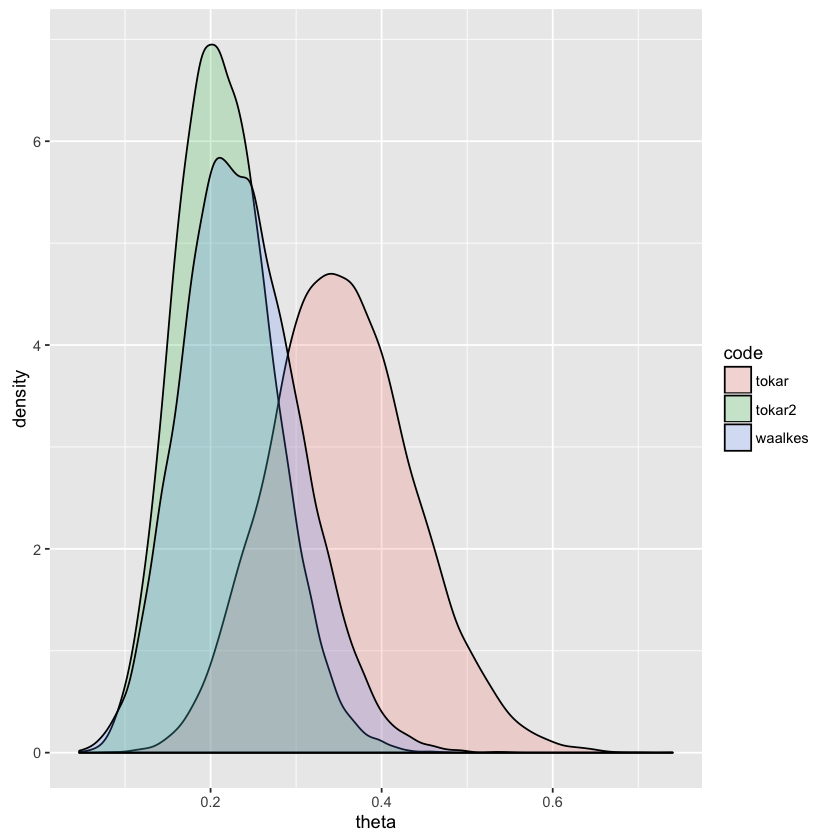

In [13]:
tokar_posterior <- as.data.frame(extract(stanFitT)[[1]])
tokar2_posterior <- as.data.frame(extract(stanFitT2)[[1]])
waalkes_posterior <- as.data.frame(extract(stanFitW)[[1]])
colnames(tokar_posterior) <- "theta"
colnames(tokar2_posterior) <- "theta"
colnames(waalkes_posterior) <- "theta"
combined_data <- rbind(tokar_posterior, tokar2_posterior, waalkes_posterior)
code <- c(rep("tokar", nrow(tokar_posterior)), rep("tokar2", nrow(tokar2_posterior)), rep("waalkes", nrow(waalkes_posterior)))
combined_data <- cbind(combined_data, code=code)
ggplot(combined_data, aes(theta, fill = code)) + geom_density(alpha = 0.2)

Naively, one might conclude that since the distribution centers (medians) are different by about 13% between the Tokar 2012 (tokar above) and the Waalkes and Tokar 2011 datasets, that the Tokar 2012 study has drastically different control tumor incidences. That conclusion would support Cohen et al's argument, and appears to be the basis of Cohen et al's argument. However, that interpretation ignores several important aspects.

There is a significant amount of uncertainty with respect to the exact control tumor incidences for Waalkes and both Tokar studies due to the fact that they are both being sampled from a distribution. As a result, it is arguably possible that both datasets are from the same distribution. Simply looking at the central tendencies or estimates of the two datasets does not allow us to draw a conclusion. However, in looking at the histrograms above, we can see that there is significant overlap between Waalkes et al and Tokar et al control tumor incidence distributions.

This type of graphical analysis, although intuitive, is not definitive. We need to look at the posterior difference of the draws from both distributions. We are using an approach that sets a region of practical equivalence (ROPE) around the zero difference, and the 95% highest density interval of the difference distribution. The ROPE demarcates a region around zero difference that is functionally equivalent to no difference. The decision rules that we will apply are:

1. If the 95% HDI is completely within the ROPE, then the incedence from the Tokar et al and Waalkes et al studies are the same.
2. If the 95% HDI contains zero, then zero difference is a credible value, meaning the incidences from the Tokar et al and Waalkes et al studies are the same.
3. If the 95% HDI does not contain zero and the 95% HDI is within the ROPE, then we cannot state that the incidences from Tokar et al and Waalkes et al are different, nor can we say strongly that they are the same. More data is required.
4. If the 95% HDI is completely outside the ROPE, then the incidences from the Tokar et al and Waalkes et al studies are different.

Thus, our first analysis will focus on whether or not the Tokar 2012 control tumor incidences are different from the Waalkes control tumor incidences (as it is clear that the Tokar 2011 control tumor incidences are not drastically different from the Waalkes control tumor incidences).

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


[1] 0.2043056

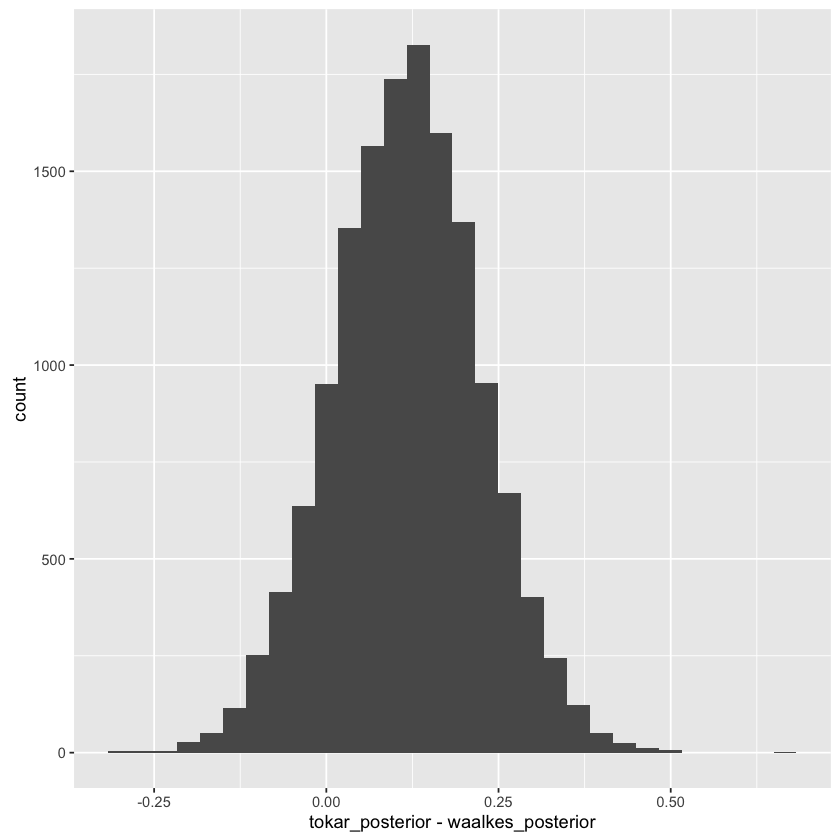

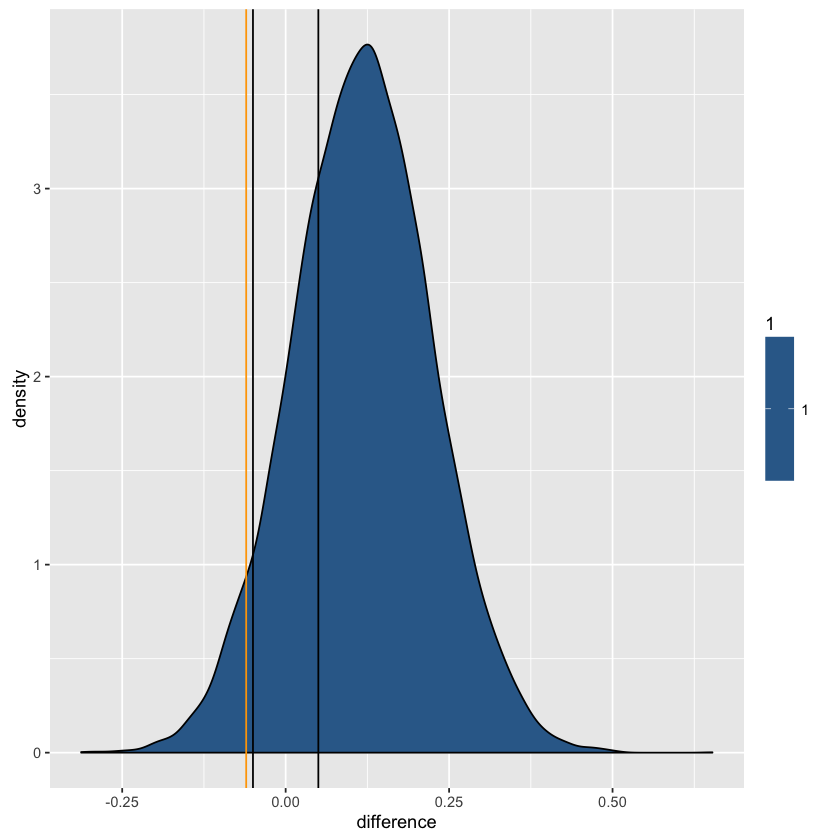

In [15]:
tokar_posterior <- extract(stanFitT)[[1]]
waalkes_posterior <- extract(stanFitW)[[1]]
qplot(tokar_posterior - waalkes_posterior, geom="histogram")
diff_distro <- as.data.frame(tokar_posterior - waalkes_posterior)
colnames(diff_distro) <- "difference"

#How much of the distribution is within the ROPE?
diff_ecdf <- ecdf(diff_distro[,1])
diff_ecdf(.05) - diff_ecdf(-.05)
#21%

ggplot(diff_distro, aes(difference, fill=1)) + 
  geom_density(alpha = 1) +
  geom_vline(xintercept = -0.05) +
  geom_vline(xintercept = 0.05) +
  geom_vline(xintercept = quantile(diff_distro[,1], probs=c(0.05)), colour="orange")

We used a ROPE of +/- 0.05 centered at a difference of zero (the black vertical lines on the histogram demarcate the boundaries of the ROPE). We applied our decision rules and concluded that the incidences from both studies are likely from the same distribution, and thus are likely the same. The difference of 13% between the incidences is likely a manifestation of a small sampling from the same distribution. Note that the posterior difference distribution also includes 0 difference within the 95% HDI (all of the distribution that is greater than the orange line), and that 21% of the posterior difference distribution is within the ROPE.

In the next analysis, we will assume that the Tokar 2012 control tumor incidences are a suitable prior for the Waalkes control tumor incidences, and perform a comparison between the resulting posterior distribution and the Tokar 2011 control tumor incidences, similar to the previous analysis. 


SAMPLING FOR MODEL '5ae0d1969359c0f23f6ff507aa5d6a74' NOW (CHAIN 1).

Chain 1, Iteration:    1 / 5000 [  0%]  (Warmup)
Chain 1, Iteration:  201 / 5000 [  4%]  (Sampling)
Chain 1, Iteration:  700 / 5000 [ 14%]  (Sampling)
Chain 1, Iteration: 1200 / 5000 [ 24%]  (Sampling)
Chain 1, Iteration: 1700 / 5000 [ 34%]  (Sampling)
Chain 1, Iteration: 2200 / 5000 [ 44%]  (Sampling)
Chain 1, Iteration: 2700 / 5000 [ 54%]  (Sampling)
Chain 1, Iteration: 3200 / 5000 [ 64%]  (Sampling)
Chain 1, Iteration: 3700 / 5000 [ 74%]  (Sampling)
Chain 1, Iteration: 4200 / 5000 [ 84%]  (Sampling)
Chain 1, Iteration: 4700 / 5000 [ 94%]  (Sampling)
Chain 1, Iteration: 5000 / 5000 [100%]  (Sampling)# 
#  Elapsed Time: 0.002204 seconds (Warm-up)
#                0.046191 seconds (Sampling)
#                0.048395 seconds (Total)
# 

SAMPLING FOR MODEL '5ae0d1969359c0f23f6ff507aa5d6a74' NOW (CHAIN 2).

Chain 2, Iteration:    1 / 5000 [  0%]  (Warmup)
Chain 2, Iteration:  201 / 5000 [  4%]  (Sampling)
Chain 2, Ite

Inference for Stan model: 5ae0d1969359c0f23f6ff507aa5d6a74.
3 chains, each with iter=5000; warmup=200; thin=1; 
post-warmup draws per chain=4800, total post-warmup draws=14400.

        mean se_mean   sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
theta   0.21    0.00 0.04   0.13   0.18   0.21   0.24   0.30  5013    1
lp__  -44.38    0.01 0.71 -46.43 -44.54 -44.11 -43.93 -43.88  6512    1

Samples were drawn using NUTS(diag_e) at Tue May  3 19:26:20 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


[1] 0.1453472

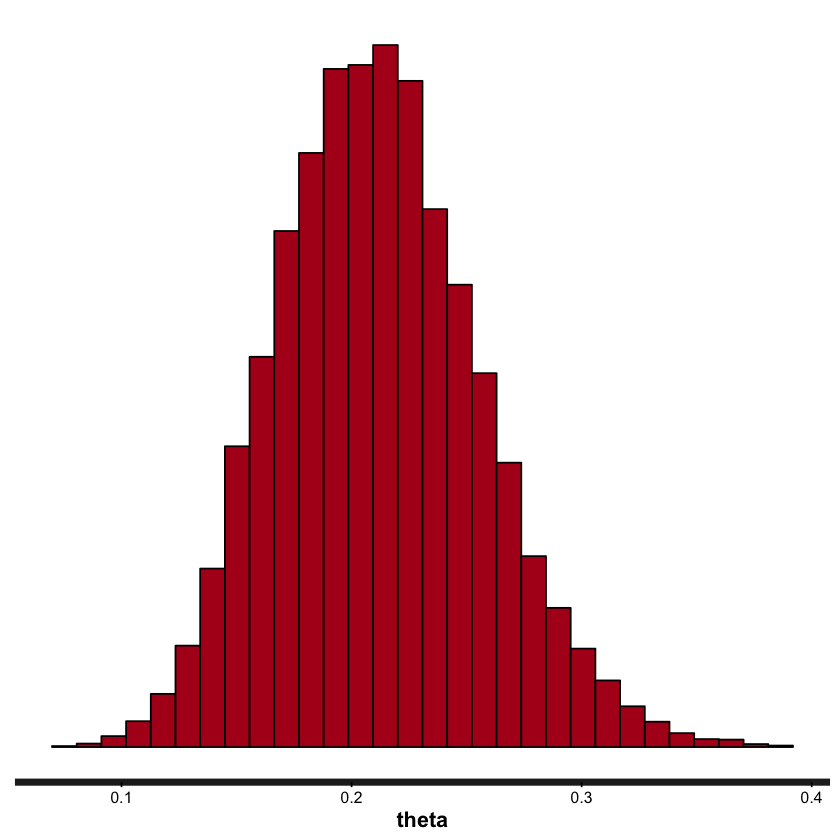

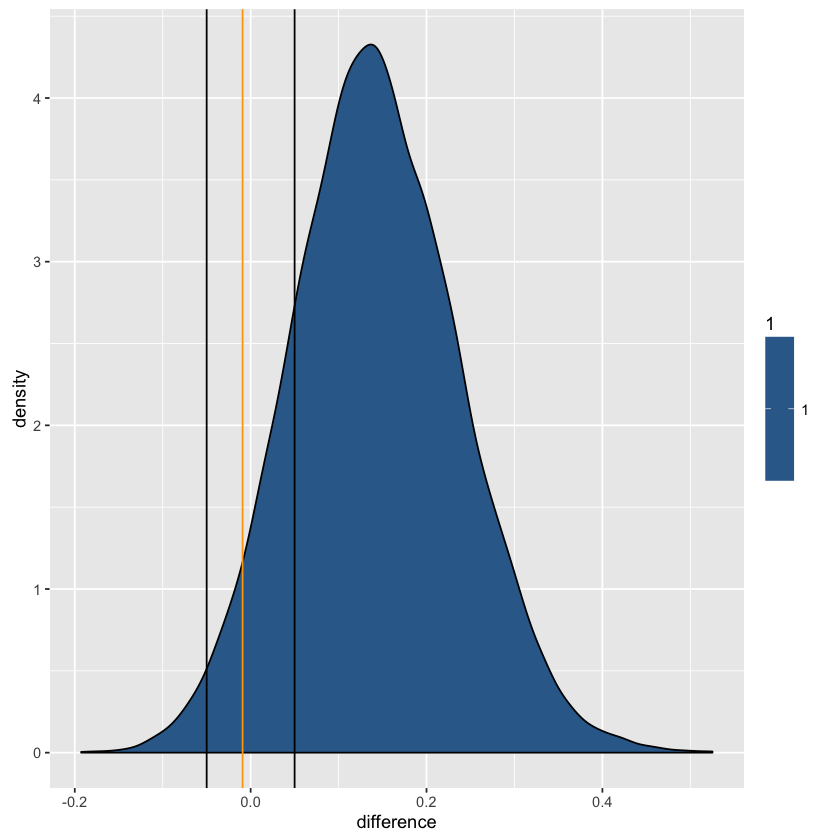

In [17]:
control_tumor_tokar_prior_modelString = "
data {
  int<lower=0> N;     //number of items
  int y[N];           // y is an N-length vector of ints
}
parameters {
  real <lower=0, upper=1> theta;
}
model {
  theta ~ beta(10, 39); //prior distribution
  y ~ bernoulli(theta); //posterior
}
"
control_tumor_stanDso <- stan_model( model_code=control_tumor_tokar_prior_modelString )
control_tumor_tw_stanFit <- sampling( object = control_tumor_stanDso , data = dataListW , chains = 3 , iter = 5000 , warmup = 200 , thin = 1 )
control_tumor_tw_stanFit
stan_hist(control_tumor_tw_stanFit)

tokar_posterior <- extract(stanFitT)[[1]]
waalkes_posterior <- extract(control_tumor_tw_stanFit)[[1]]

diff_distro <- as.data.frame(tokar_posterior - waalkes_posterior)
colnames(diff_distro) <- "difference"

#How much of the distribution is within the ROPE?
diff_ecdf <- ecdf(diff_distro[,1])
diff_ecdf(.05) - diff_ecdf(-.05)
#21%

ggplot(diff_distro, aes(difference, fill=1)) + 
  geom_density(alpha = 1) +
  geom_vline(xintercept = -0.05) +
  geom_vline(xintercept = 0.05) +
  geom_vline(xintercept = quantile(diff_distro[,1], probs=c(0.05)), colour="orange")

This analysis demonstrates that there is substantially no posterior difference between the Tokar 2012 study and the posterior based on using the Tokar 2011 study as a prior with the Waalkes data. This further demonstrates that it is more than likely that the Tokar 2012 study and the Tokar 2011 and Waalkes studies all come from the same underlying distribution, and that any differences are due to sampling.



## Does inorganic arsenic exposure increase the tumor incidence in the Waalkes et al study?

Based on our analysis we have established that Cohen et al's argument that the control tumor incidences are different in the two studies is invalid. Next, we assessed if inorganic arsenic exposure increased the tumor incidence in the Waalkes et al study at different doses. To do this, we used Tokar et al's control data as the prior, and Waalkes et al's control data as the likelihood and constructed the posterior distribution for the control tumor incidence across the two studies. Then we compared the posterior distribution control tumor incidence to the posterior distribution for the tumor incidences in the various inorganic arsenic exposure levels. We used a flat uninformative prior to generate the posterior distributions for each arsenic exposure. Then we sampled from the posterior distribution for each arsenic exposure and we sampled from the posterior distribution for the control tumor incidence. Finally, we took the difference of these values and constructed a posterior distribution of the difference between each arsenic exposure concentration and the controls.

### Construct Posterior Probability for Control Tumor Incidence

First, we constructed the control tumor incidence posterior distribution. We had to build a new model. We had already analytically solved to identify that Tokar et al's control tumor incidence is properly modeled with by a beta(20, 58) distribution.



SAMPLING FOR MODEL 'cdfd29f0cbed1232221c732a268e73e6' NOW (CHAIN 1).

Chain 1, Iteration:    1 / 5000 [  0%]  (Warmup)
Chain 1, Iteration:  201 / 5000 [  4%]  (Sampling)
Chain 1, Iteration:  700 / 5000 [ 14%]  (Sampling)
Chain 1, Iteration: 1200 / 5000 [ 24%]  (Sampling)
Chain 1, Iteration: 1700 / 5000 [ 34%]  (Sampling)
Chain 1, Iteration: 2200 / 5000 [ 44%]  (Sampling)
Chain 1, Iteration: 2700 / 5000 [ 54%]  (Sampling)
Chain 1, Iteration: 3200 / 5000 [ 64%]  (Sampling)
Chain 1, Iteration: 3700 / 5000 [ 74%]  (Sampling)
Chain 1, Iteration: 4200 / 5000 [ 84%]  (Sampling)
Chain 1, Iteration: 4700 / 5000 [ 94%]  (Sampling)
Chain 1, Iteration: 5000 / 5000 [100%]  (Sampling)# 
#  Elapsed Time: 0.002255 seconds (Warm-up)
#                0.045593 seconds (Sampling)
#                0.047848 seconds (Total)
# 

SAMPLING FOR MODEL 'cdfd29f0cbed1232221c732a268e73e6' NOW (CHAIN 2).

Chain 2, Iteration:    1 / 5000 [  0%]  (Warmup)
Chain 2, Iteration:  201 / 5000 [  4%]  (Sampling)
Chain 2, Ite

Inference for Stan model: cdfd29f0cbed1232221c732a268e73e6.
3 chains, each with iter=5000; warmup=200; thin=1; 
post-warmup draws per chain=4800, total post-warmup draws=14400.

        mean se_mean   sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
theta   0.25    0.00 0.04   0.17   0.22   0.24   0.27   0.33  5409    1
lp__  -64.04    0.01 0.70 -66.03 -64.20 -63.78 -63.60 -63.55  5312    1

Samples were drawn using NUTS(diag_e) at Wed May  4 09:47:22 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


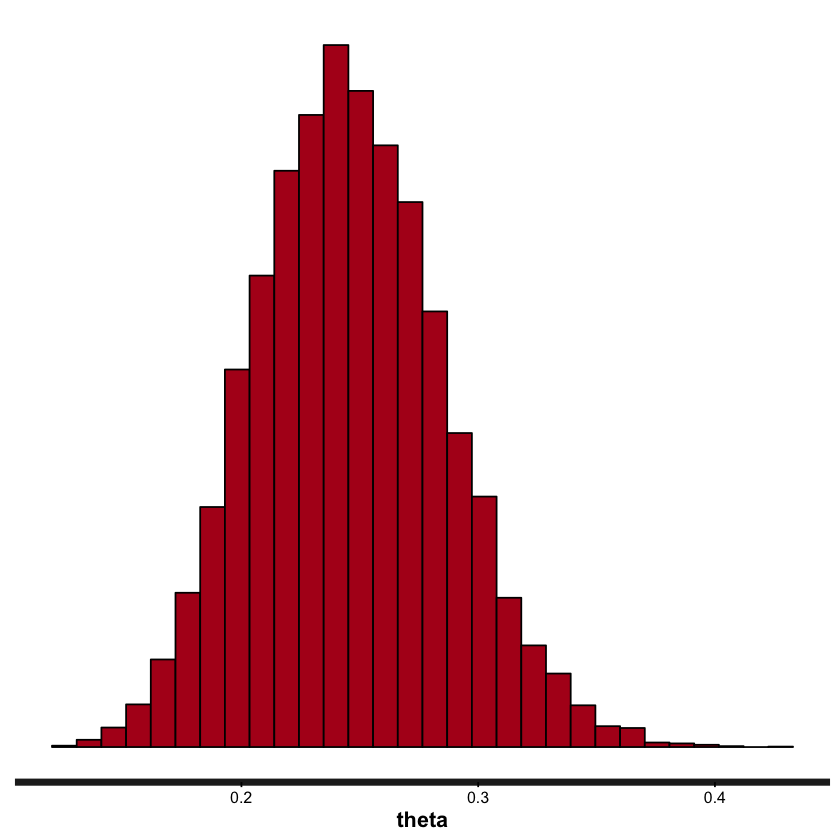

In [18]:
# THE MODEL.
control_tumor_modelString = "
data {
  int<lower=0> N;     //number of items
  int y[N];           // y is an N-length vector of ints
}
parameters {
  real <lower=0, upper=1> theta;
}
model {
  theta ~ beta(20, 58); //prior distribution
  y ~ bernoulli(theta); //posterior
}
"
control_tumor_stanDso <- stan_model( model_code=control_tumor_modelString )
control_tumor_stanFit <- sampling( object = control_tumor_stanDso , data = dataListW , chains = 3 , iter = 5000 , warmup = 200 , thin = 1 )
control_tumor_stanFit
stan_hist(control_tumor_stanFit)

We can see that the distribution has a mean of 25%. Thus, we would estimate that the overall control tumor incidence is approximately 25%, after taking into consideration our prior knowledge from Tokar et al and the latest data from Waalkes et al.

### 50ppb inorganic arsenic
We will assess the Waalkes et al tumor incidences in mice exposed to inorganic arsenic in the same way as we assessed if there were differences between the control tumor incidences in the Tokar et al and Waalkes et al studies. The only difference is that we used the updated posterior distribution for control tumor incidences we just calculated above.



SAMPLING FOR MODEL '2dcba63f61ddd7c9bd68c7381443898a' NOW (CHAIN 1).

Chain 1, Iteration:    1 / 5000 [  0%]  (Warmup)
Chain 1, Iteration:  201 / 5000 [  4%]  (Sampling)
Chain 1, Iteration:  700 / 5000 [ 14%]  (Sampling)
Chain 1, Iteration: 1200 / 5000 [ 24%]  (Sampling)
Chain 1, Iteration: 1700 / 5000 [ 34%]  (Sampling)
Chain 1, Iteration: 2200 / 5000 [ 44%]  (Sampling)
Chain 1, Iteration: 2700 / 5000 [ 54%]  (Sampling)
Chain 1, Iteration: 3200 / 5000 [ 64%]  (Sampling)
Chain 1, Iteration: 3700 / 5000 [ 74%]  (Sampling)
Chain 1, Iteration: 4200 / 5000 [ 84%]  (Sampling)
Chain 1, Iteration: 4700 / 5000 [ 94%]  (Sampling)
Chain 1, Iteration: 5000 / 5000 [100%]  (Sampling)# 
#  Elapsed Time: 0.002167 seconds (Warm-up)
#                0.052956 seconds (Sampling)
#                0.055123 seconds (Total)
# 

SAMPLING FOR MODEL '2dcba63f61ddd7c9bd68c7381443898a' NOW (CHAIN 2).

Chain 2, Iteration:    1 / 5000 [  0%]  (Warmup)
Chain 2, Iteration:  201 / 5000 [  4%]  (Sampling)
Chain 2, Ite

Inference for Stan model: 2dcba63f61ddd7c9bd68c7381443898a.
3 chains, each with iter=5000; warmup=200; thin=1; 
post-warmup draws per chain=4800, total post-warmup draws=14400.

        mean se_mean   sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
theta   0.51    0.00 0.08   0.36   0.46   0.51   0.57   0.67  5028    1
lp__  -27.53    0.01 0.72 -29.58 -27.69 -27.25 -27.07 -27.02  4951    1

Samples were drawn using NUTS(diag_e) at Wed May  4 09:49:36 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


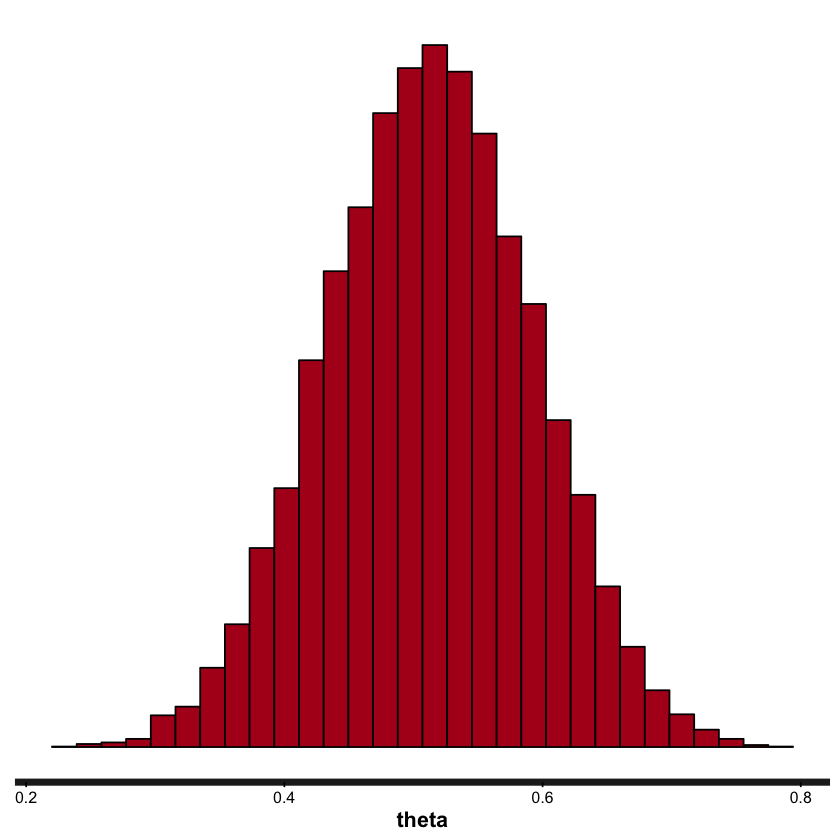

In [19]:
# 50ppb inorganic arsenic
Nw <- 37  #total animals
zw <- 19  #total tumors -- adenomas or carcinomas
yw <- c(rep(1,zw), rep(0, Nw-zw))
dataList50ppb <- list(y=yw, N=Nw)
stanFit50ppb <- sampling( object = stanDso , data = dataList50ppb , chains = 3 , iter = 5000 , warmup = 200 , thin = 1 )
stanFit50ppb
stan_hist(stanFit50ppb)

Based on this analysis, the average tumor incidence in the 50ppb exposed group is 51%. This is similar to the result seen in Waalkes et al. Next we will perform the difference analysis.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


[1] 0.007291667

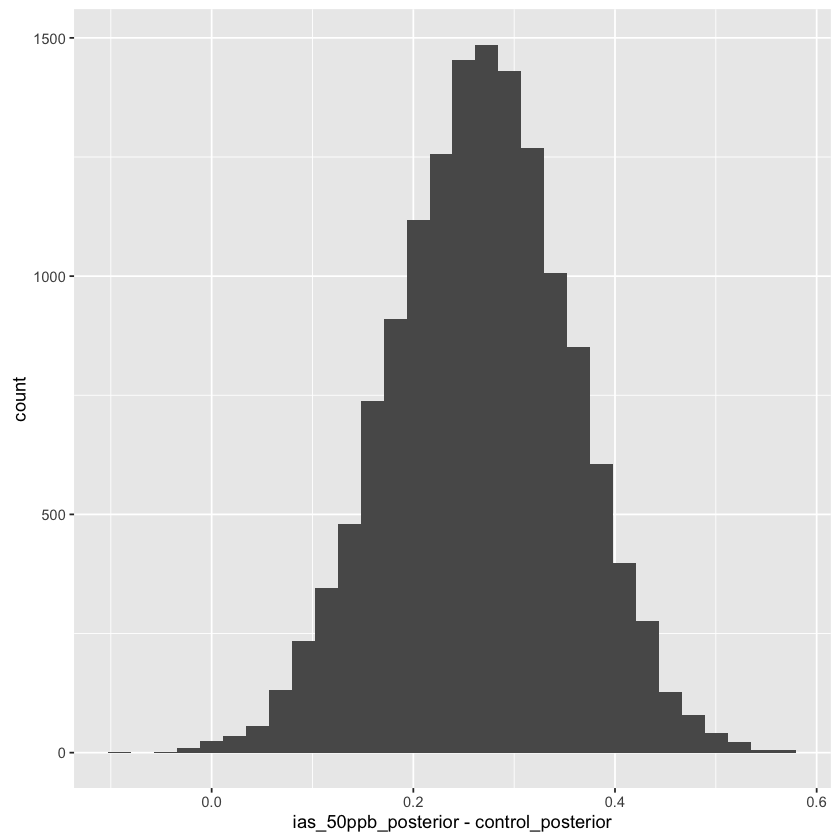

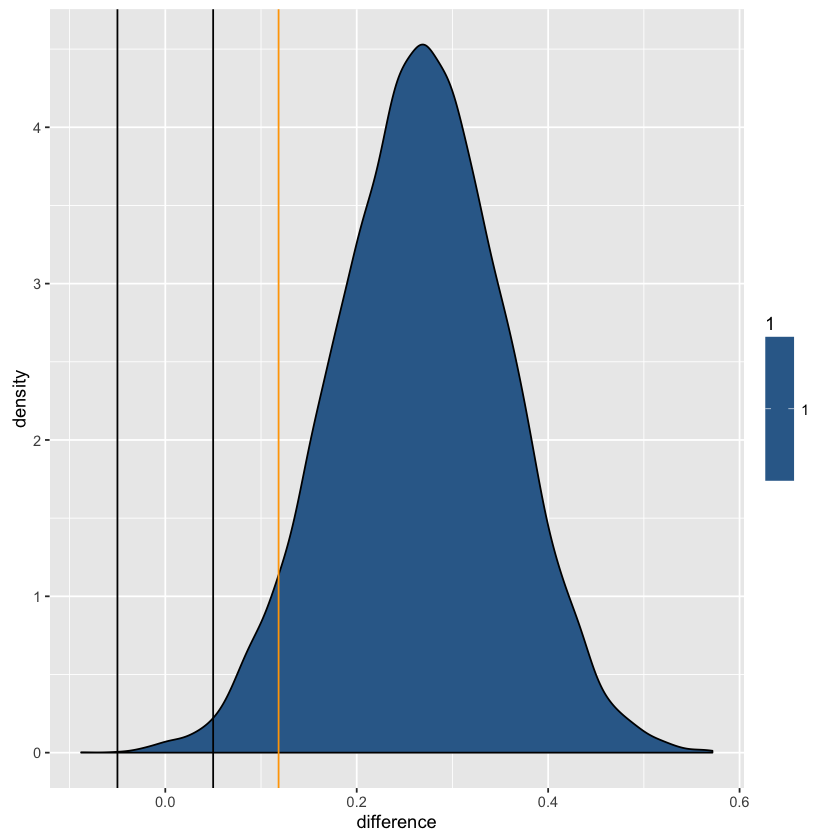

In [20]:
control_posterior <- extract(control_tumor_stanFit)[[1]]
ias_50ppb_posterior <- extract(stanFit50ppb)[[1]]
qplot(ias_50ppb_posterior - control_posterior, geom="histogram")
diff_distro <- as.data.frame(ias_50ppb_posterior - control_posterior)
colnames(diff_distro) <- "difference"

#How much of the distribution is within the ROPE?
diff_ecdf <- ecdf(diff_distro[,1])
diff_ecdf(.05) - diff_ecdf(-.05)
#0.03%

ggplot(diff_distro, aes(difference, fill=1)) + 
  geom_density(alpha = 1) +
  geom_vline(xintercept = -0.05) +
  geom_vline(xintercept = 0.05) +
  geom_vline(xintercept = quantile(diff_distro[,1], probs=c(0.05)), colour="orange")

The 95% HDI was completely outside of the ROPE, thus the null hypothesis was rejected. Expanding the ROPE slightly, such as to +/-0.10, still would not bring the 95% HDI within the ROPE. We do not feel that a +/-10% rope is justified, when dealing with tumor incidences in the control population that are approximately 28%. Specifically, we do not believe it is biologically plausible that a tumor incidence that spans from 18-38% can be considered practically equivalent, whereas we feel that one that spans from 23-33% is. Thus, based on our decision criteria, we find that 50ppb inorganic arsenic exposure causes an increase in the lung adenoma and carcinoma tumor incidence in mice.

In [22]:
#odds ratio
odds_exposed_tumor <- .51/(1-.51)
odds_non_exposed_tumor <- .25/(1-.25)
odds_ratio <- odds_exposed_tumor / odds_non_exposed_tumor
odds_ratio

[1] 3.122449

Said another way, 3.1:1 are the odds of a mouse exposed to 50ppb inorganic arsenic developing lung tumors compared to a non-exposed mouse

### 500ppb inorganic arsenic


SAMPLING FOR MODEL '2dcba63f61ddd7c9bd68c7381443898a' NOW (CHAIN 1).

Chain 1, Iteration:    1 / 5000 [  0%]  (Warmup)
Chain 1, Iteration:  201 / 5000 [  4%]  (Sampling)
Chain 1, Iteration:  700 / 5000 [ 14%]  (Sampling)
Chain 1, Iteration: 1200 / 5000 [ 24%]  (Sampling)
Chain 1, Iteration: 1700 / 5000 [ 34%]  (Sampling)
Chain 1, Iteration: 2200 / 5000 [ 44%]  (Sampling)
Chain 1, Iteration: 2700 / 5000 [ 54%]  (Sampling)
Chain 1, Iteration: 3200 / 5000 [ 64%]  (Sampling)
Chain 1, Iteration: 3700 / 5000 [ 74%]  (Sampling)
Chain 1, Iteration: 4200 / 5000 [ 84%]  (Sampling)
Chain 1, Iteration: 4700 / 5000 [ 94%]  (Sampling)
Chain 1, Iteration: 5000 / 5000 [100%]  (Sampling)# 
#  Elapsed Time: 0.002208 seconds (Warm-up)
#                0.04766 seconds (Sampling)
#                0.049868 seconds (Total)
# 

SAMPLING FOR MODEL '2dcba63f61ddd7c9bd68c7381443898a' NOW (CHAIN 2).

Chain 2, Iteration:    1 / 5000 [  0%]  (Warmup)
Chain 2, Iteration:  201 / 5000 [  4%]  (Sampling)
Chain 2, Iter

Inference for Stan model: 2dcba63f61ddd7c9bd68c7381443898a.
3 chains, each with iter=5000; warmup=200; thin=1; 
post-warmup draws per chain=4800, total post-warmup draws=14400.

        mean se_mean   sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
theta   0.54    0.00 0.08   0.38   0.48   0.54   0.59   0.69  5200    1
lp__  -27.42    0.01 0.71 -29.43 -27.58 -27.15 -26.97 -26.92  6005    1

Samples were drawn using NUTS(diag_e) at Wed May  4 09:53:12 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


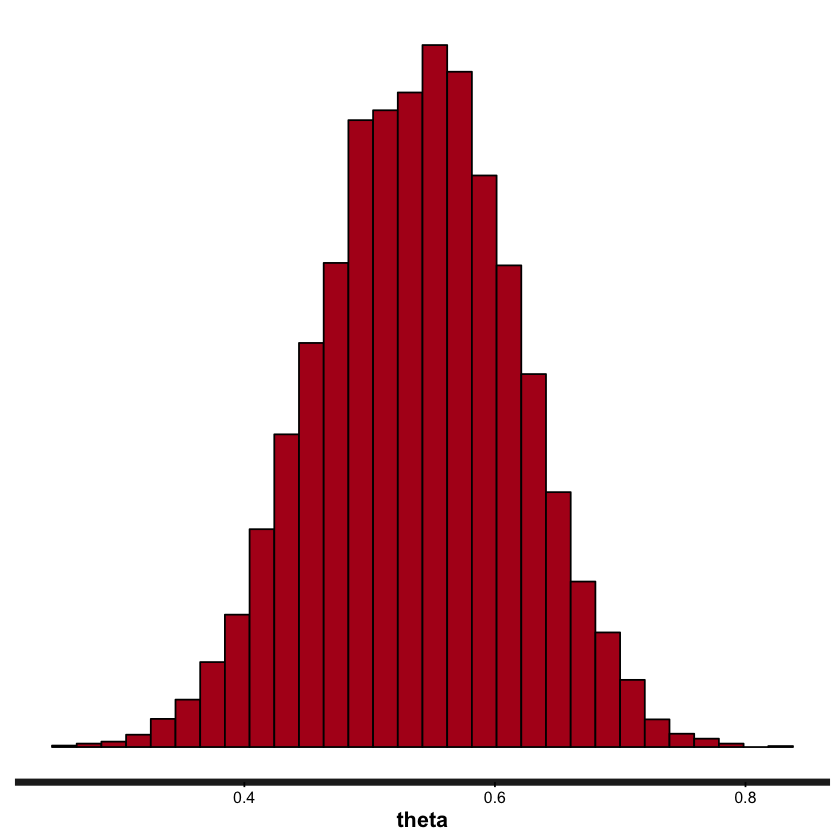

In [23]:
# 500ppb inorganic arsenic
Nw <- 37  #total animals
zw <- 20  #total tumors -- adenomas or carcinomas
yw <- c(rep(1,zw), rep(0, Nw-zw))
dataList500ppb <- list(y=yw, N=Nw)
stanFit500ppb <- sampling( object = stanDso , data = dataList500ppb , chains = 3 , iter = 5000 , warmup = 200 , thin = 1 )
stanFit500ppb
stan_hist(stanFit500ppb)

Based on this analysis, the average tumor incidence in the 500ppb exposed group is 54%. This is similar to the result in Waalkes et al. Next, we performed the difference analysis.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


[1] 0.003055556

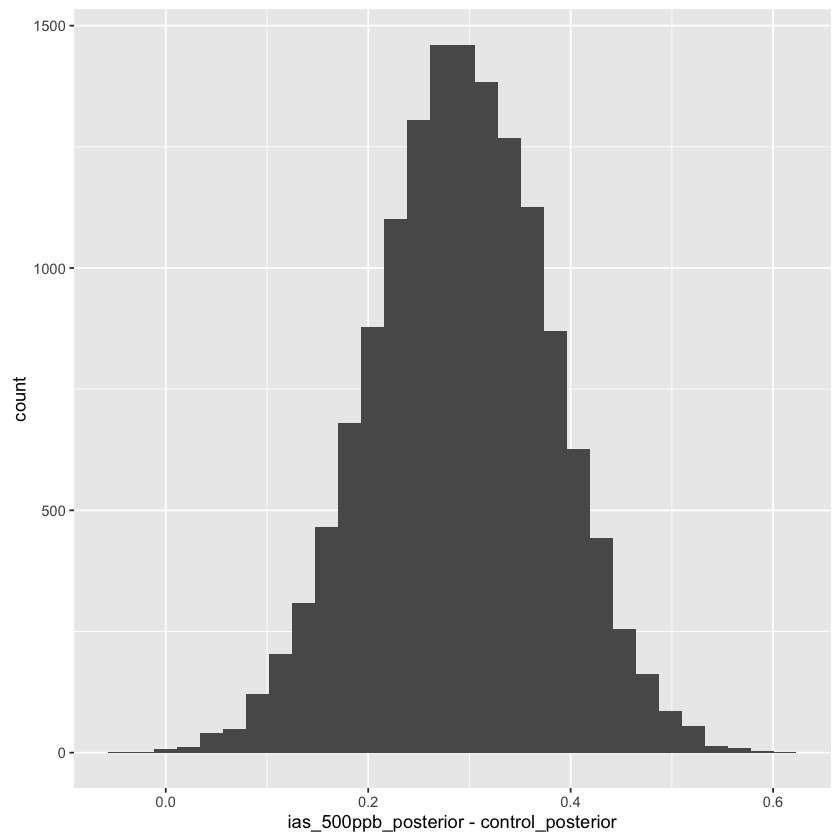

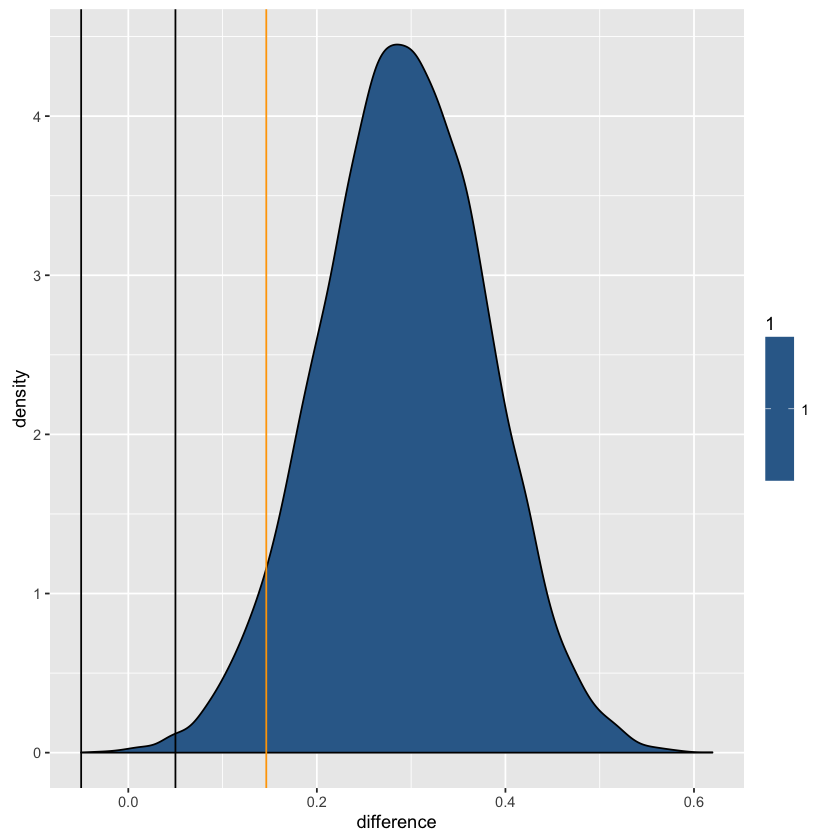

In [24]:
control_posterior <- extract(control_tumor_stanFit)[[1]]
ias_500ppb_posterior <- extract(stanFit500ppb)[[1]]
qplot(ias_500ppb_posterior - control_posterior, geom="histogram")
diff_distro <- as.data.frame(ias_500ppb_posterior - control_posterior)
colnames(diff_distro) <- "difference"

#How much of the distribution is within the ROPE?
diff_ecdf <- ecdf(diff_distro[,1])
diff_ecdf(.05) - diff_ecdf(-.05)
#0.02%

ggplot(diff_distro, aes(difference, fill=1)) + 
  geom_density(alpha = 1) +
  geom_vline(xintercept = -0.05) +
  geom_vline(xintercept = 0.05) +
  geom_vline(xintercept = quantile(diff_distro[,1], probs=c(0.05)), colour="orange")

The 95% HDI is completely outside of the ROPE, thus the null hypothesis is rejected. Thus, based on our decision criteria, we find that 500ppb inorganic arsenic exposure causes an increase in the lung adenoma and carcinoma tumor incidence in mice.

In [25]:
#odds ratio
odds_exposed_tumor <- .54/(1-.54)
odds_non_exposed_tumor <- .25/(1-.25)
odds_ratio <- odds_exposed_tumor / odds_non_exposed_tumor
odds_ratio

[1] 3.521739

Said another way, 3.5:1 were the odds that a mouse exposed to 500ppb inorganic arsenic would develop lung tumors  compared to a non-exposed mouse.

### 5,000ppb inorganic arsenic


SAMPLING FOR MODEL '2dcba63f61ddd7c9bd68c7381443898a' NOW (CHAIN 1).

Chain 1, Iteration:    1 / 5000 [  0%]  (Warmup)
Chain 1, Iteration:  201 / 5000 [  4%]  (Sampling)
Chain 1, Iteration:  700 / 5000 [ 14%]  (Sampling)
Chain 1, Iteration: 1200 / 5000 [ 24%]  (Sampling)
Chain 1, Iteration: 1700 / 5000 [ 34%]  (Sampling)
Chain 1, Iteration: 2200 / 5000 [ 44%]  (Sampling)
Chain 1, Iteration: 2700 / 5000 [ 54%]  (Sampling)
Chain 1, Iteration: 3200 / 5000 [ 64%]  (Sampling)
Chain 1, Iteration: 3700 / 5000 [ 74%]  (Sampling)
Chain 1, Iteration: 4200 / 5000 [ 84%]  (Sampling)
Chain 1, Iteration: 4700 / 5000 [ 94%]  (Sampling)
Chain 1, Iteration: 5000 / 5000 [100%]  (Sampling)# 
#  Elapsed Time: 0.00221 seconds (Warm-up)
#                0.048471 seconds (Sampling)
#                0.050681 seconds (Total)
# 

SAMPLING FOR MODEL '2dcba63f61ddd7c9bd68c7381443898a' NOW (CHAIN 2).

Chain 2, Iteration:    1 / 5000 [  0%]  (Warmup)
Chain 2, Iteration:  201 / 5000 [  4%]  (Sampling)
Chain 2, Iter

Inference for Stan model: 2dcba63f61ddd7c9bd68c7381443898a.
3 chains, each with iter=5000; warmup=200; thin=1; 
post-warmup draws per chain=4800, total post-warmup draws=14400.

        mean se_mean   sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
theta   0.29    0.00 0.07   0.17   0.24   0.29   0.34   0.44  4732    1
lp__  -25.30    0.01 0.71 -27.36 -25.46 -25.02 -24.84 -24.79  4530    1

Samples were drawn using NUTS(diag_e) at Wed May  4 09:53:39 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


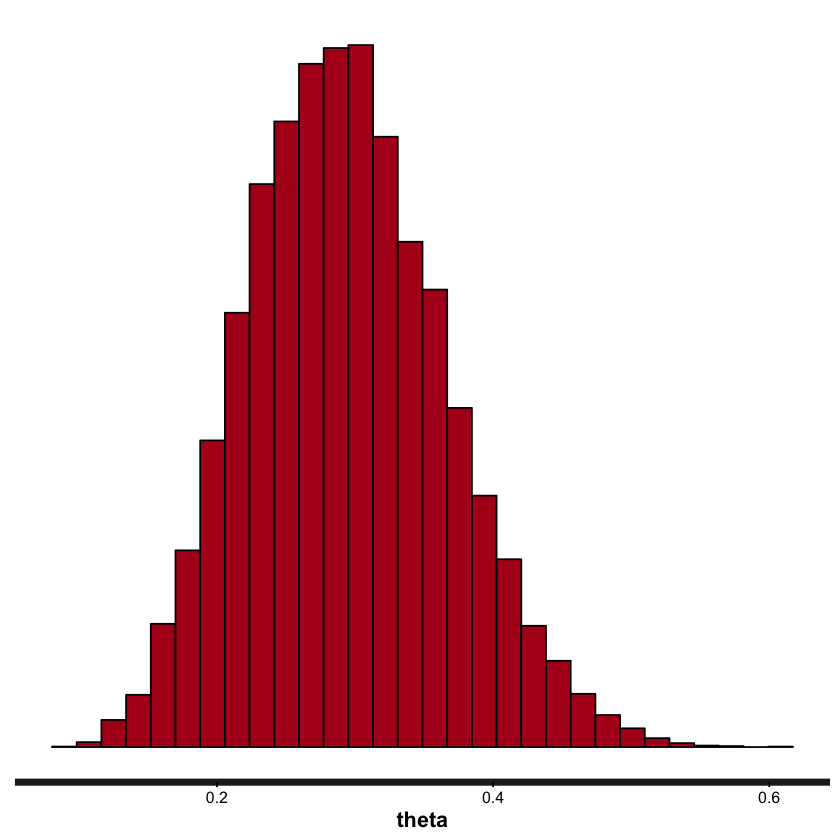

In [26]:
# 5000ppb inorganic arsenic
Nw <- 39  #total animals
zw <- 11  #total tumors -- adenomas or carcinomas
yw <- c(rep(1,zw), rep(0, Nw-zw))
dataList5000ppb <- list(y=yw, N=Nw)
stanFit5000ppb <- sampling( object = stanDso , data = dataList5000ppb , chains = 3 , iter = 5000 , warmup = 200 , thin = 1 )
stanFit5000ppb
stan_hist(stanFit5000ppb)

Based on this analysis, the average tumor incidence in the 5000ppb exposed group was 29%. This is similar to the result seen in Waalkes et al. Next we performed the difference analysis.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


[1] 0.4100694

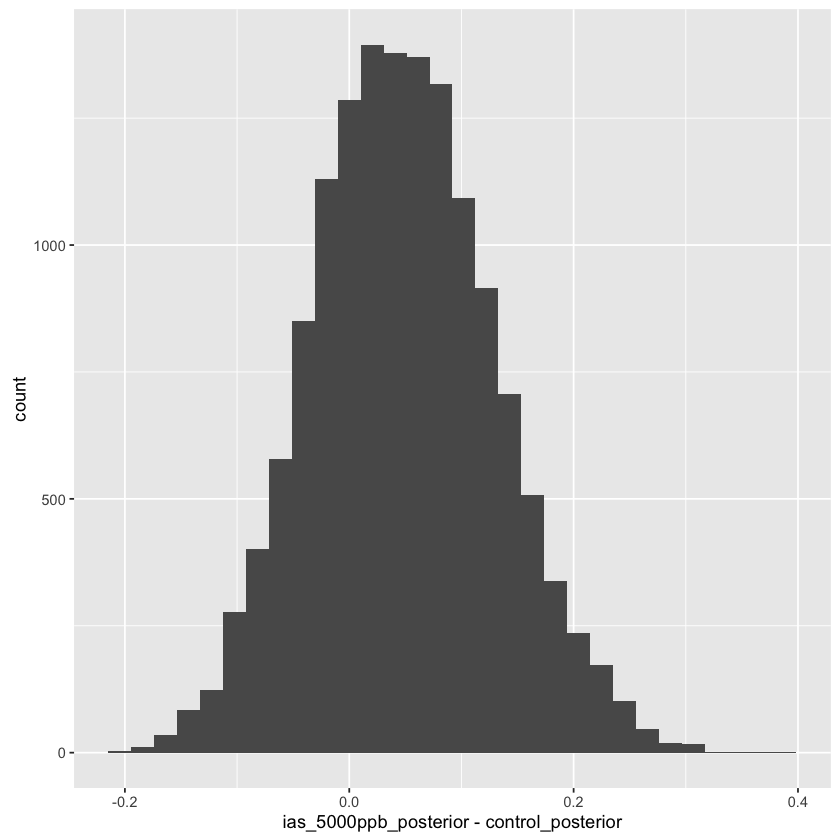

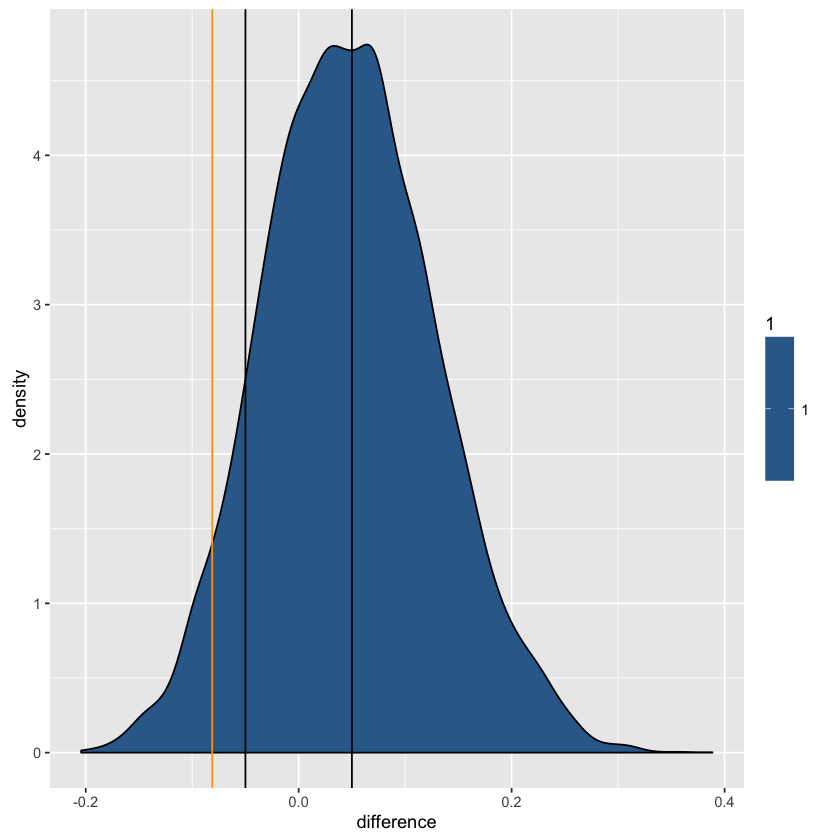

In [27]:
control_posterior <- extract(control_tumor_stanFit)[[1]]
ias_5000ppb_posterior <- extract(stanFit5000ppb)[[1]]
qplot(ias_5000ppb_posterior - control_posterior, geom="histogram")
diff_distro <- as.data.frame(ias_5000ppb_posterior - control_posterior)
colnames(diff_distro) <- "difference"

#How much of the distribution is within the ROPE?
diff_ecdf <- ecdf(diff_distro[,1])
diff_ecdf(.05) - diff_ecdf(-.05)
#0.43%

ggplot(diff_distro, aes(difference, fill=1)) + 
  geom_density(alpha = 1) +
  geom_vline(xintercept = -0.05) +
  geom_vline(xintercept = 0.05) +
  geom_vline(xintercept = quantile(diff_distro[,1], probs=c(0.05)), colour="orange")

The 95% HDI is inside of the ROPE, thus the null hypothesis is accepted. Based on our decision criteria, we find that 5000ppb inorganic arsenic exposure does not cause an increase in the lung adenoma and carcinoma tumor incidence in mice.

In [28]:
#odds ratio
odds_exposed_tumor <- .29/(1-.29)
odds_non_exposed_tumor <- .25/(1-.25)
odds_ratio <- odds_exposed_tumor / odds_non_exposed_tumor
odds_ratio

[1] 1.225352

Said another way, we feel that the odds of a mouse exposed to 5000ppb inorganic arsenic developing lung tumors 1.2:1 compared to a non-exposed mouse.

## Discussion
In Cohen et al (2014 and 2015), the authors argue that had Waalkes et al considered the historical control data Waalkes et al would have seen there is no treatment-related response. Specifically, Cohen et al (2014) state "[t]he peculiar, conflicting results are likely due to the high variability in incidence of lung tumors in CD-1 mice."

In our first analysis we assessed the similarity/differences between the Tokar et al and Waalkes et al control tumor incidences. Our analysis did not support the argument from Cohen et al. In fact, our analysis suggests that although there is a 13% difference in control tumor incidences, in reality, this difference is likely to be due to simple random sampling. Our Bayesian analysis reflects the fact that the data are likely being sampled from the same distribution. In that case, it is not uncommon, and in fact would be expected, that one would see this level of difference. Thus, we are satisfied that there is not sufficient evidence to support Cohen et al's argument. However, we do concur with Cohen et al in that the control tumor incidences from both Tokar studies (2011 and 2012) should be used in the analysis of Waalkes et al data. We base this conclusion on the fact that the control tumor incidences from the Tokar studies are likely exchangeable with the control tumor incidences in the Waalkes et al study. Thus, we used the control tumor incidence posterior probability from both Tokar studies as the prior distribution for our Bayesian analysis of Waalkes et al's data.

We had previously analytically solved that Tokar et al's data could be modeled using a Beta(20, 58) distribution. Using that as our prior, we analyzed each of the inorganic arsenic exposure levels (50, 500, 5,000ppb) and constructed posterior distributions for each concentration. Using the ROPE and HDI approach, we confirmed Waalkes et al's previous results that there is a significant increase in adenomas and carcinomas in male mice at 50 and 500ppb, but not at 5,000ppb.

Thus, we have accounted for prior knowledge of the background tumor incidence in CD1 mice in Waalkes' lab using data from Tokar et al, and still confirmed the results from Waalkes et al. In so doing, we have addressed Cohen et al's chief concern in the Waalkes analysis of not accounting for the variability in CD1 mouse tumor incidences in Waalkes' lab. Furthermore, we have confirmed that inorganic arsenic exposure is increasing the lung tumor incidence in CD1 mice at 50 and 500ppb, but not at 5,000ppb. Thus, we have addressed Cohen et al's analytical concerns, and affirmed the findings from Waalkes et al.

## Conclusion
Based on our analyses, we have rejected the argument from Cohen et al that the Waalkes et al study did not reproduce the control tumor incidence from the Tokar et al study. Furthermore, using Tokar et al as prior knowledge, we were able to affirm the results from Waalkes et al. Specifically, that 50 and 500ppb inorganic arsenic exposure increased lung tumor incidences in males by 3.1:1 and 3.5:1 odds, respectively. In addition, we affirmed Waalkes et al's analysis that 5,000ppb inorganic arsenic exposure did not increase lung tumor incidences in male CD1 mice, with odds of only 1.2:1. Thus, assuming there are no issues with the experimental data, we find that Waalkes et al's study demonstrates low dose inorganic arsenic exposures increases in lung tumor incidences in CD1 male mice.

## Acknowledgements
The views expressed in this manuscript are those of the authors and do not necessarily reflect the views or policies of the U.S. Army or the U.S. EPA.

## References

1. Cohen SM, Arnold LL, Klaunig JE, et al. Letter to the Editor Arch Toxicol. 2014 doi: 10.1007/s00204-014-1328-1.
2. Cohen SM, Arnold LL, Klaunig JE, et al. Letter to the Editor Arch Toxicol. 2015 doi: 10.1007/s00204-015-1614-6.
3. Tokar, et al. Carcinogenic effects of “whole-life” exposure to inorganic arsenic in CD1 mice. Toxicol Sci. 2011;119:73–83.
4. Tokar EJ, Bhalchnadra AD, Waalkes MP. Renal, hepatic, pulmonary and adrenal tumors induced by prental inorganic arsenic followed by dimethylarsinic acid in adulthood in CD1 mice. Toxicol Lett 2012. 209(2): 178-185.
5. Waalkes MP, Qu W, Tokar EJ, et al. Lung tumors in mice induced by “whole-life” inorganic arsenic exposure at human-relevant doses. Arch Toxicol. 2014;88:1619–1629.